# 기본 파일로 입출력
* 파이썬은 다양한 파일(txt 등)들을 읽고 쓰기에 매우 유용.
* jupyter에서만 가능한 방법

In [2]:
%%writefile myfile.txt
Hello this is a text file
this is the second line
this is the third line

Writing myfile.txt


* 지금 현재 폴더에 파일이 작성됨
* 아래 코드는 현재 폴더에 파일이 잘 작성되는 지를 확인한다.
* `pwd` :현재 위치 알기
* `ls` : 현재 위치 폴더에 뭐가 있는지 전부 출력

In [6]:
pwd

'C:\\Users\\C4022\\Desktop\\한이음'

In [7]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D6FC-F589

 C:\Users\C4022\Desktop\한이음 디렉터리

2023-05-21  오후 05:57    <DIR>          .
2023-05-21  오후 05:57    <DIR>          ..
2023-05-21  오후 05:54    <DIR>          .ipynb_checkpoints
2023-05-21  오후 05:57             3,186 03. 파이썬에서 기본 파일로 입출력.ipynb
2023-05-21  오후 05:52    <DIR>          23_HF135
2023-05-21  오후 05:54               916 for using gitlab.ipynb
2023-05-21  오후 05:54                76 myfile.txt
2023-05-21  오후 05:57    <DIR>          각종 자료
               3개 파일               4,178 바이트
               5개 디렉터리  111,033,057,280 바이트 남음


## 파일 읽기
* `open('파일이름.')`활용
* 'read()`
    * 문서 파일에 뭐가 있든 긴 문자열로 반환함.
    * 단 하나의 문자열로 반환
* readlines()이용.
    * 한 줄씩 읽어서 리스트로 가져옴.
    * 마찬가지로 맨뒤에 `\n`이 있다.

In [8]:
myfile = open('myfile.txt')

In [9]:
# 만약 없는 경우
myfile = open('dklaj.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'dklaj.txt'

* 위의 에러는 파일 이름을 잘못 입력한 경우와 경로를 잘못 지정한 경우 모두 발생할 수 있다.

In [10]:
myfile = open('myfile.txt')

In [11]:
myfile.read()

'Hello this is a text file\nthis is the second line\nthis is the third line\n'

* enter키 입력의 경우 `\n`으로 표현됨.

In [12]:
myfile.read()

''

* 다시 읽는 경우 빈 문자열 출력
* 이는 처음에 open을 했을 때 커서가 파일의 맨 처음으로 되어 있는데 read()를 하고 나면, 커서가 맨 뒤로 이동되어 이제 더이상 읽을 문자열이 없기 때문이다.
* 이를 해결하기 위해선 커서를 다시 설정하거나 커서를 다시 처음으로 보내야한다.
    * `seek()`활용 : 커서 재설정

In [16]:
 myfile.seek(0) # 커서를 0으로 돌림

0

In [15]:
myfile.read() # 다시 값을 읽음

'Hello this is a text file\nthis is the second line\nthis is the third line\n'

In [18]:
myfile.readlines()

['Hello this is a text file\n',
 'this is the second line\n',
 'this is the third line\n']

## 파일 위치
* 위에서는 같은 폴더에 있는 파일만 읽었는데 그렇게 사용할 경우 매우 불편함.
* 따라서 다른 위치에 있는 파일들도 잘 읽을 수 있도록 해야함
    * 읽을 파일의 경로를 잘 지정해 준다면, 다른 위치에 있는 파일도 잘 읽을 수 있다.
    * 윈도우, linuex에 따라서 문법이 달라짐
        * 이 경우 단순히 pwd를 쳐서 어떤 문법인지 확인하고 사용하면 됨.
    

## 파일 닫기
* 파일을 열었으면 닫아 주어야함.
* `.close()`를 이용해서 닫아준다.
* 만약 파일을 열고나서 닫지 않고 삭제하려고 하면, 어딘가에서 사용중이라고 에러가 발생하게 된다.
* `with`을 이용해서 직접 닫지 않고 자동으로 열고 닫는 방식을 사용해도 된다.

In [20]:
myfile.close()

In [21]:
with open('myfile.txt') as my_new_file:
    contets = my_new_file.read()

In [23]:
contets

'Hello this is a text file\nthis is the second line\nthis is the third line\n'

## 파일 쓰기
* open할 때 모드를 'w'로 설정한다.
    * 해당 경우 기본적으로 파일을 쓰기로 사용되기 때문에 읽을려고 하면 문제가 생긴다.
* open할 때 모드를 'a'로 설정한다.
    * 해당 경우 기본적으로 파일을 추가로 사용하기 때문에 입력시 맨 뒤에 입력된 정보들이 들어간다.

In [24]:
with open('myfile.txt', mode = 'w') as my_new_file:
    contets = my_new_file.read()

UnsupportedOperation: not readable

* 쓰기 모드이므로 기본적으로 에러 발생.

### 다양한 모드들.  
  
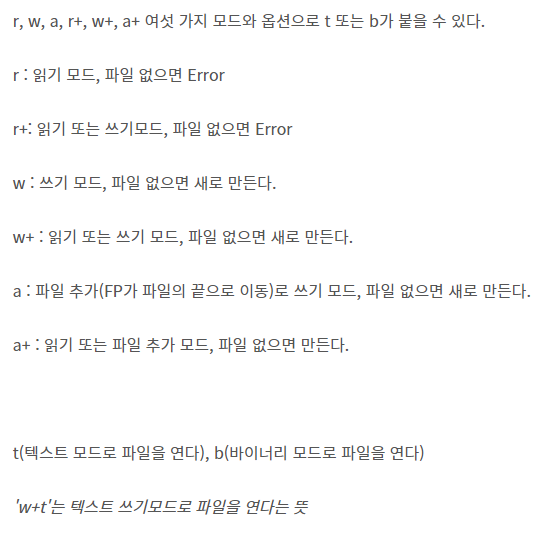

#### 주의점
* w+와 r+는 경우 동작이 비슷한것 같지만 다른 작업을 함.
    * w+의 경우 기존 파일에 있던 데이터를 지우고 새로 쓴다.
    * r+의 경우 기존 파일내용들을 두고 그 위에 덮어 쓰기를 사용.

* 예시(기존파일에 Hello world! 및  abc 입력시 )
    * w+ 모드 시 -> abc
    * r+ 모드 시 -> abclo world!
    * a+ 모드 시 -> Hello world!abc